# Medicine   Recommendation Tool
##### Final Project of COMPFEST 16
by Sevolve:
- Asybel Bintang
- William Joseph
- Samantha Benedicta

## IMPORT

In [1]:
!pip install faiss-gpu  # install faiss-gpu (used as a similarity calculation alternative)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 9.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("/content/drive/MyDrive/COMPFEST DS - Sevolve/Final Project/dataset/compfest_250kMedicines_2.csv")
df2 = pd.read_csv("/content/drive/MyDrive/COMPFEST DS - Sevolve/Final Project/dataset/compfest_250kMedicines_1.csv")
df1_or = df1.copy()  # original df1
df2_or = df2.copy()  # original df2

<ipython-input-2-d50d742d3d0e>:6: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/content/drive/MyDrive/COMPFEST DS - Sevolve/Final Project/dataset/compfest_250kMedicines_1.csv")


## DATA UNDERSTANDING

### df1

In [ ]:
df1.shape

(253973, 9)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  253973 non-null  int64  
 1   name                253973 non-null  object 
 2   price(₹)            253973 non-null  float64
 3   Is_discontinued     253973 non-null  bool   
 4   manufacturer_name   253973 non-null  object 
 5   type                253973 non-null  object 
 6   pack_size_label     253973 non-null  object 
 7   short_composition1  253973 non-null  object 
 8   short_composition2  112171 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 15.7+ MB


In [ ]:
df1.drop('id', axis=1).describe()

,price(₹)
count,253973.000000
mean,270.530844
std,3029.584134
min,0.000000
25%,48.000000
50%,79.000000
75%,140.000000
max,436000.000000


In [ ]:
df1.head()

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN


In [ ]:
df1.sample(10)

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
100434,100435,Gat Plus 50 mg/125 mg Suspension,25.62,False,Thrift Pharmaceuticals,allopathy,bottle of 60 ml Suspension,Nimesulide (50mg),Paracetamol (125mg)
81994,81995,Evopraz Capsule,39.30,False,Osiante Biotech,allopathy,strip of 15 capsules,Omeprazole (20mg),NaN
9890,9891,Atoritic 10mg Tablet,70.98,False,Wockhardt Ltd,allopathy,strip of 10 tablets,Atorvastatin (10mg),NaN
205367,205368,Sonicard 2.5mg Tablet,26.92,False,Blue Cross Laboratories Ltd,allopathy,strip of 10 tablets,Nebivolol (2.5mg),NaN
162038,162039,Optihist Plus Eye Drop,96.00,False,Entod Pharmaceuticals Ltd,allopathy,packet of 5 ml Eye Drop,Chlorpheniramine Maleate (0.03% w/v),Sodium Chloride (0.05% w/v)
224348,224349,Tamlago-D 0.4mg/0.5mg Tablet,169.00,False,Inizia Healthcare Pvt Ltd,allopathy,strip of 10 tablets,Tamsulosin (0.4mg),Dutasteride (0.5mg)
217779,217780,Tadalix 10mg Tablet,90.00,False,Psychocare Health Pvt Ltd,allopathy,strip of 10 tablets,Tadalafil (10mg),NaN
202069,202070,Serepax 30mg Tablet,12.88,False,Pfizer Ltd,allopathy,strip of 10 tablets,Oxazepam (30mg),NaN
3119,3120,Azimol 500 Tablet,56.00,False,Anmol Healthcare,allopathy,strip of 3 tablets,Azithromycin (500mg),NaN
25387,25388,Adenmox CV 250mg/125mg Tablet,90.00,False,Adenscot Healthcare,allopathy,strip of 6 tablets,Amoxycillin (250mg),Clavulanic Acid (125mg)


In [ ]:
df1['type'].unique()
# insight: hanya ada 1 unique values dalam type sehingga dapat di drop tanpa mempengaruhi model

array(['allopathy'], dtype=object)

In [ ]:
df1['manufacturer_name'].unique()

array(['Glaxo SmithKline Pharmaceuticals Ltd',
       'Alembic Pharmaceuticals Ltd', 'Glenmark Pharmaceuticals Ltd', ...,
       'Bliss Life Pharmaceuticals', 'Z Plus Remedies',
       'Anamiva Life Sciences'], dtype=object)

In [ ]:
df1['pack_size_label'].unique()

array(['strip of 10 tablets', 'strip of 5 tablets',
       'bottle of 100 ml Syrup', ..., 'bottle of 6 gm Oral Suspension',
       'bottle of 6 gm Powder', 'packet of 14 rheocap'], dtype=object)

In [ ]:
len(df1['pack_size_label'].unique())

1929

### df2

In [ ]:
df2.shape

(248218, 58)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248218 entries, 0 to 248217
Data columns (total 58 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   id                 248218 non-null  int64 
 1   name               248218 non-null  object
 2   substitute0        238621 non-null  object
 3   substitute1        233867 non-null  object
 4   substitute2        230233 non-null  object
 5   substitute3        226856 non-null  object
 6   substitute4        223962 non-null  object
 7   sideEffect0        248218 non-null  object
 8   sideEffect1        238416 non-null  object
 9   sideEffect2        229500 non-null  object
 10  sideEffect3        207638 non-null  object
 11  sideEffect4        163560 non-null  object
 12  sideEffect5        131258 non-null  object
 13  sideEffect6        91857 non-null   object
 14  sideEffect7        67750 non-null   object
 15  sideEffect8        48506 non-null   object
 16  sideEffect9        3

In [ ]:
df2.head()

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,...,NaN,Treatment of Cough with mucus,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,...,NaN,Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)


In [ ]:
df2.sample(10)

,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
76776,76777,dilser 50mg/10mg tablet,Bludec-SP Tablet,Seracure D 50mg/10mg Tablet,Alser D 50mg/10mg Tablet,Diser Tablet,Diclomol SP 10 Tablet,Nausea,Vomiting,Heartburn,...,NaN,Pain relief,NaN,NaN,NaN,NaN,NaN,No,PAIN ANALGESICS,NaN
48766,48767,cindon 15mg/20mg tablet,Sinadom Tablet,Slorzin D 15mg/20mg Tablet,CINRON 15MG/20MG TABLET,Cinarvib-D Tablet,Cinagen-D Tablet,Nausea,Dryness in mouth,Indigestion,...,NaN,Vertigo,NaN,NaN,NaN,NaN,NaN,No,GASTRO INTESTINAL,NaN
129359,129360,leflox 500mg tablet,Nirliv 500mg Tablet,Cenquin 500mg Tablet,Levocef 500mg Tablet,Levoshan 500mg Tablet,Qulef 500mg Tablet,Headache,Dizziness,Nausea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Fluoroquinolone,No,OPHTHAL,Quinolones/ Fluroquinolones
181538,181539,odds up syrup,Onstart Syrup,Detron Syrup,Nitron Syrup,Eden Syrup,Emless Syrup,Constipation,Diarrhea,Fatigue,...,NaN,Treatment of Nausea,Treatment of Vomiting,NaN,NaN,NaN,Carbazole Derivative,No,GASTRO INTESTINAL,Serotonin antagonists (5-HT3 antagonists)
41900,41901,cablok 10 tablet,Ciledge 10 Tablet,Cilday 10mg Tablet,Natcocil 10 Tablet,Cilnigrap 10mg Tablet,Cilnipres 10mg Tablet,Fatigue,Sleepiness,"Flushing (sense of warmth in the face, ears, n...",...,NaN,Treatment of Hypertension (high blood pressure),Prevention of Angina (heart-related chest pain),Prevention of Heart attack,Prevention of Stroke,NaN,Dihydropyridinecarboxylic acids derivatives,No,CARDIAC,Calcium channel blockers- Dihydropyridines (DHP)
66203,66204,dytor plus 10 tablet,Vitator SP Tablet,Torsid Plus 10/50 Tablet,Torspec Plus 50mg/10mg Tablet,Aldactone T 10 Tablet,Jbtor Plus 50mg/10mg Tablet,Dizziness,Frequent urge to urinate,Headache,...,NaN,Treatment of Edema,NaN,NaN,NaN,NaN,NaN,No,CARDIAC,NaN
211922,211923,somastat 250mcg injection,Somatin 250mcg Injection,Sotin 250mcg Injection,Somastin 250mcg Injection,NaN,NaN,Diarrhea,Abdominal pain,Constipation,...,NaN,Acromegaly,Carcinoid tumours,Bleeding esophageal varices,NaN,NaN,Somatostatin Analogues,No,HORMONES,Somatostatin analogues
155862,155863,methnilon 1000mg injection,M-Prisol Injection,Rednisol S 1000mg Injection,Philpred 1000mg Injection,Elopred 1000mg Injection,Drudrol 1000mg Injection,Nausea,Sweating,Edema (swelling),...,NaN,Treatment of Rheumatic disorder,Treatment of Systemic lupus erythematosus (SLE),Treatment of Allergic conditions,Treatment of Eye disorders,Treatment of Skin disorders,Glucocorticoids,No,HORMONES,Glucocorticoids
229021,229022,volitis gel,Gesicube Gel,Dicovax Gel,NaN,NaN,NaN,"Application site reactions (burning, irritatio...",NaN,NaN,...,NaN,Pain relief,NaN,NaN,NaN,NaN,NaN,No,PAIN ANALGESICS,NaN
2532,2533,adc gel,Alight Plus Gel 15gm for Acne Treatment,Nayzit Gel,Nioclean AD Gel,Acnesol A Nano Gel,Acnicin Gel,Skin peeling,Erythema (skin redness),Itching,...,NaN,Treatment of Acne,NaN,NaN,NaN,NaN,NaN,No,DERMA,NaN


In [ ]:
df2['sideEffect0'].unique()[:20]

array(['Vomiting', 'Nausea', 'Headache', 'Sleepiness', 'Sedation',
       'Application site reactions (burning, irritation, itching and redness)',
       'Dizziness', 'Unusual production of breast milk in women and men',
       'Tremors', 'Lightheadedness', 'Fatigue', 'Tachycardia', 'Rash',
       'Diarrhea', 'Bleeding', 'Stomach pain',
       'Upper respiratory tract infection',
       'Injection site reactions (pain, swelling, redness)',
       'Dryness in mouth', 'Upset stomach'], dtype=object)

In [ ]:
df2['substitute0'].unique()

array(['Penciclav 500 mg/125 mg Tablet', 'Zithrocare 500mg Tablet',
       'Solvin LS Syrup', ..., 'Tusban-D Syrup',
       'Pirazole D 15 mg/10 mg Capsule', 'Uniace P Oral Suspension'],
      dtype=object)

In [ ]:
use0_unique_count = len(df2['use0'].unique())
print(f'use0 unique values count: {use0_unique_count}')
print(df2['use0'].unique()[:20])
# insights:
  # Ada penyakit yang diawali "Treatment of" ada yang tidak
  # Ada penyakit yang diawali "Prevention of"

use0 unique values count: 657
['Treatment of Bacterial infections' 'Treatment of Cough with mucus'
 'Treatment of Sneezing and runny nose due to allergies'
 'Treatment of Allergic conditions' 'Treatment of Anxiety'
 'Treatment of Dry cough'
 'Treatment of Gastroesophageal reflux disease (Acid reflux)'
 'Treatment of Piles' 'Treatment of Resistance Tuberculosis (TB)'
 'Treatment of Cough' 'Treatment of Hypertension (high blood pressure)'
 'Treatment of Nausea' 'Treatment of Parasitic infections'
 'Treatment of Chronic obstructive pulmonary disease (COPD)'
 ' Pain relief' 'Treatment of Short term anxiety'
 ' Hypertension (high blood pressure)'
 ' Prevention of heart attack and stroke' 'Treatment of Gout'
 'Treatment of Benign prostatic hyperplasia']


In [ ]:
df2['Therapeutic Class'].unique()

array(['ANTI INFECTIVES', 'RESPIRATORY', 'GASTRO INTESTINAL', 'DERMA',
       'CARDIAC', 'NEURO CNS', 'PAIN ANALGESICS', 'BLOOD RELATED',
       'UROLOGY', 'VITAMINS MINERALS NUTRIENTS', 'GYNAECOLOGICAL',
       'OPHTHAL', 'ANTI NEOPLASTICS', 'VACCINES', 'ANTI DIABETIC',
       'SEX STIMULANTS REJUVENATORS', 'OPHTHAL OTOLOGICALS', 'OTHERS',
       'STOMATOLOGICALS', 'HORMONES', 'OTOLOGICALS', 'ANTI MALARIALS',
       nan], dtype=object)

In [ ]:
df2['Chemical Class'].unique()[:20]

array([nan, 'Macrolides', 'Diphenylmethane Derivative',
       'Pyridines Derivatives', 'Piperazine Derivative',
       'Aralkylamines Derivative', 'Imidazoline derivative',
       'Phenothiazine Derivative', '2-Benzimidazolylcarbamic acid esters',
       'Benzyl Alcohols Derivatives', 'Benzodiazepines Derivative',
       'Aminopenicillins Penicillins', 'Potassium sparing diuretics',
       'Triazolopyrimidines', 'Carboxylic acid derivative',
       'Quinazoline Derivative', 'Vitamin D Derivative [cholecalciferol]',
       'Xanthinic Derivatives', 'Aminopenicillins {Penicillins}',
       'Methyl Analog of Dextrorphan'], dtype=object)

In [ ]:
df2['Action Class'].unique()[:20]

array([nan, 'Macrolides', 'H1 Antihistaminics (second Generation)',
       'H1 Antihistaminics (First Generation)', 'H2 Receptor Blocker',
       'Alpha 2-adrenoceptors agonist (Central sympatholytics)',
       'Antiprotozoal agents', 'Short acting β2-agonists',
       'Benzodiazepines',
       'Cell wall active agent -Extended spectrum Penicillin',
       'Potassium- sparing Diuretics', 'P2Y12 inhibitors (ADP receptor)',
       'Uricosuric agent-gout',
       'Uroselective adrenergic receptor(α1a) antagonist', 'Vitamins',
       'Theophylline & its derivatives', 'Cough suppressants',
       'HMG CoA inhibitors (statins)',
       'Calcium channel blockers- Dihydropyridines (DHP)',
       'Tricyclic antidepressants'], dtype=object)

In [ ]:
df2['Habit Forming'].unique()

array(['No', 'Yes'], dtype=object)

## DATA PREPARATION

In [ ]:
# Remove Type Column
df1.drop('type', axis = 1, inplace = True)
# Drop discontinued medicines
df1 = df1[df1['Is_discontinued'] != True]
df1 = df1.drop('Is_discontinued', axis = 1)
# Drop duplicates
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
# Drop irrelevant df2 columns
drop_columns = ['sideEffect5','sideEffect6', 'sideEffect7', 'sideEffect8', 'sideEffect9','sideEffect10', 'sideEffect11', 'sideEffect12', 'sideEffect13','sideEffect14', 'sideEffect15', 'sideEffect16', 'sideEffect17','sideEffect18', 'sideEffect19', 'sideEffect20', 'sideEffect21','sideEffect22', 'sideEffect23', 'sideEffect24', 'sideEffect25','sideEffect26', 'sideEffect27', 'sideEffect28', 'sideEffect29','sideEffect30', 'sideEffect31', 'sideEffect32', 'sideEffect33','sideEffect34', 'sideEffect35', 'sideEffect36', 'sideEffect37','sideEffect38', 'sideEffect39', 'sideEffect40', 'sideEffect41']
df2.drop(drop_columns, axis = 1, inplace = True)

In [ ]:
# Remove values that start with "Treatment of"
use_columns = ['use0', 'use1', 'use2', 'use3', 'use4']
df2[use_columns] = df2[use_columns].apply(lambda x: x.str.lower().replace(r'^treatment of|^prevention of', '', regex=True))

#Replace Yes with True adn No with False
df2['Habit Forming'] = df2['Habit Forming'].replace({'Yes': True, 'No': False})

# Fix Common Cold values
replacement_dict = {
    '$name is a combination medicine that effectively relieves symptoms of the common cold, such as a blocked nose, runny nose, watery eyes, sneezing, and congestion or stuffiness. it helps loosen thick mucus, making it easier to cough out. it also shrinks the blood vessels and provides rapid relief that lasts for several hours. these actions make breathing easier. \n\n$name is safe and effective. it usually starts to work within a few minutes, and the effects can last up to several hours. take it as prescribed by your doctor, and do not stop using it unless you are advised otherwise. common cold': 'common cold'
}
use_columns = ['use0', 'use1', 'use2', 'use3', 'use4']
df2[use_columns] = df2[use_columns].replace(replacement_dict)

In [ ]:
# Make a consistent capitalization (lower)

columns_df1 = ['name', 'manufacturer_name', 'pack_size_label', 'short_composition1', 'short_composition2']
# Apply .str.lower() to the columns in df1
df1[columns_df1] = df1[columns_df1].apply(lambda x: x.str.lower())

columns_df2 = [
    'name', 'substitute0', 'substitute1', 'substitute2', 'substitute3', 'substitute4',
    'sideEffect0', 'sideEffect1', 'sideEffect2', 'sideEffect3', 'sideEffect4',
    'Chemical Class', 'Therapeutic Class', 'Action Class'
]
# Apply .str.lower() to the columns in df2
df2[columns_df2] = df2[columns_df2].apply(lambda x: x.str.lower())

In [ ]:
# Inner join df1 and df2
merged_df = pd.merge(df1, df2, on='name', how='inner')
merged_df.drop(['id_x', 'id_y'], axis = 1, inplace = True)
merged_df.drop_duplicates(inplace=True)
# reset index
merged_df = merged_df.reset_index(drop=True)

# Build DATABASE SET
database = merged_df.copy()

In [ ]:
# Build TRAINING SET
training_df = merged_df.copy()

# drop irrelevant columns for training set
side_effects = ['sideEffect0', 'sideEffect1', 'sideEffect2', 'sideEffect3', 'sideEffect4']
substitutes = ['substitute0', 'substitute1', 'substitute2', 'substitute3', 'substitute4']
training_df.drop(side_effects, axis=1, inplace=True)
training_df.drop(substitutes, axis=1, inplace=True)
training_df.drop(['price(₹)', 'manufacturer_name', 'pack_size_label'], axis=1, inplace=True)

In [ ]:
# Saving database
database.to_csv("/content/drive/MyDrive/COMPFEST DS - Sevolve/Final Project/dataset/med_database.csv", index=False)
# save training data
training_df.to_csv("/content/drive/MyDrive/COMPFEST DS - Sevolve/Final Project/dataset/medicine_training.csv", index=False)

In [ ]:
database['price(₹)'].max()

q1 = database['price(₹)'].quantile(0.25)
q3 = database['price(₹)'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# removing price outliers
database_cleaned = database[(database['price(₹)'] >= lower_bound) & (database['price(₹)'] <= upper_bound)].copy()

## EXPLORATORY DATA ANALYSIS

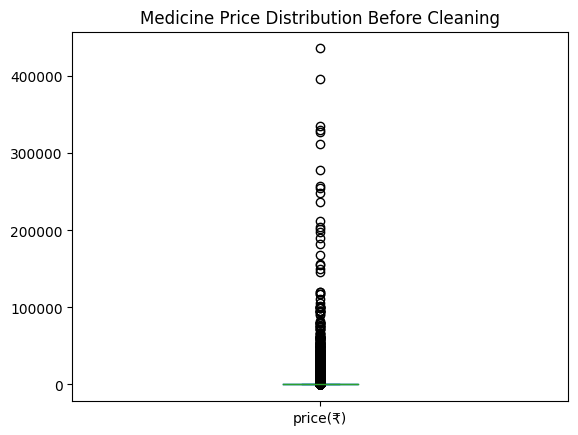

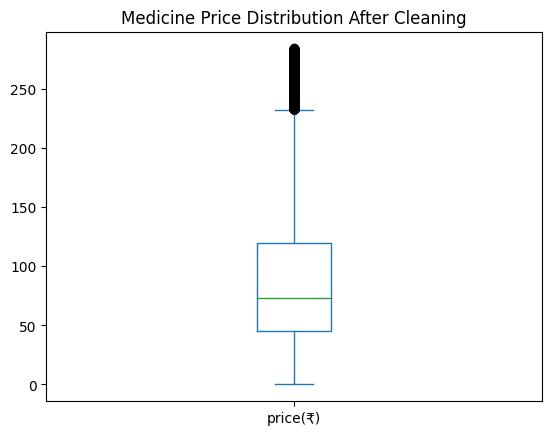

In [ ]:
# Check price outliers
# Price boxplot before it is cleaned
df1_or.plot(kind='box', y='price(₹)', title='Medicine Price Distribution Before Cleaning')
plt.show()
# Price boxplot after it is cleaned
database_cleaned.plot(kind='box', y='price(₹)', title='Medicine Price Distribution After Cleaning')
plt.show()

# INSIGHT: identified extreme values (outliers) in the price(₹) data before and after cleaning

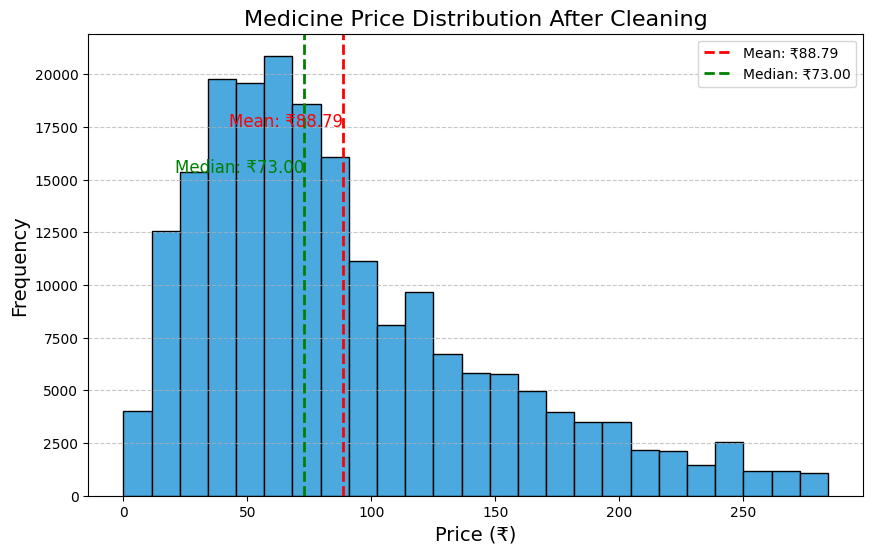

In [ ]:
# Medicine price distribution
price_data = database_cleaned['price(₹)']

# Plot the histogram
plt.figure(figsize=(10, 6))  # Increase figure size for better readability
plt.hist(price_data, bins=25, color='#4ca9df', edgecolor='black')  # Add edge color

# Add title and labels
plt.title('Medicine Price Distribution After Cleaning', fontsize=16)
plt.xlabel('Price (₹)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Calculate and plot mean and median
mean_price = np.mean(price_data)
median_price = np.median(price_data)
plt.axvline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Mean: ₹{mean_price:.2f}')
plt.axvline(median_price, color='green', linestyle='--', linewidth=2, label=f'Median: ₹{median_price:.2f}')

# Annotate the mean and median
plt.text(mean_price, plt.ylim()[1]*0.8, f'Mean: ₹{mean_price:.2f}', color='red', fontsize=12, ha='right')
plt.text(median_price, plt.ylim()[1]*0.7, f'Median: ₹{median_price:.2f}', color='green', fontsize=12, ha='right')

# Show legend
plt.legend()

# Show the plot
plt.show()

# INSIGHT: The price distribution is right-skewed, indicating that while most medicines are priced on the lower end, there are a few with significantly higher prices.

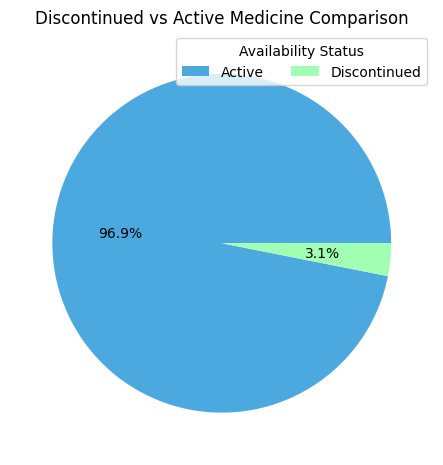

In [ ]:
# Discontinued vs Active medicine comparison [PIE CHART]
fig, ax = plt.subplots(figsize=(8, 5.5), subplot_kw=dict(aspect="equal"))
ax.pie(x=df1_or['Is_discontinued'].value_counts(), autopct= '%1.1f%%', colors=['#4ca9df','#a1ffb3'])
ax.set_title('Discontinued vs Active Medicine Comparison')
ax.legend(labels=['Active', 'Discontinued'],
          title="Availability Status", loc = 0, ncol = 2
          )
plt.show()

# INSIGHT: 96.9% of the medicines are still active, meaning they are currently available for use. The majority of the medicines are still in circulation

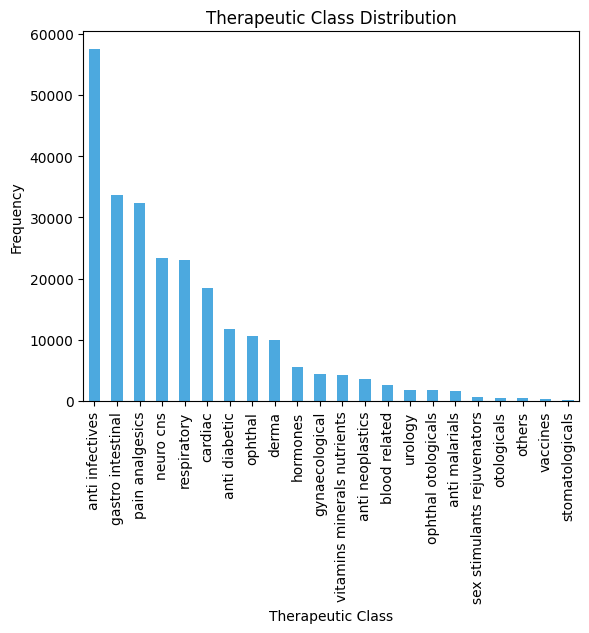

In [ ]:
# Therapeutic Class Distribution
df2['Therapeutic Class'].value_counts().plot(kind = 'bar', title='Therapeutic Class Distribution', color='#4ca9df')
plt.xlabel('Therapeutic Class')
plt.ylabel('Frequency')
plt.show()

# INSIGHT: The most common therapeutic class is "anti infectives," with a frequency approaching 60,000. "Gastro intestinal" and "pain analgesics" are the next most frequent categories, each with significant frequencies above 30,000.

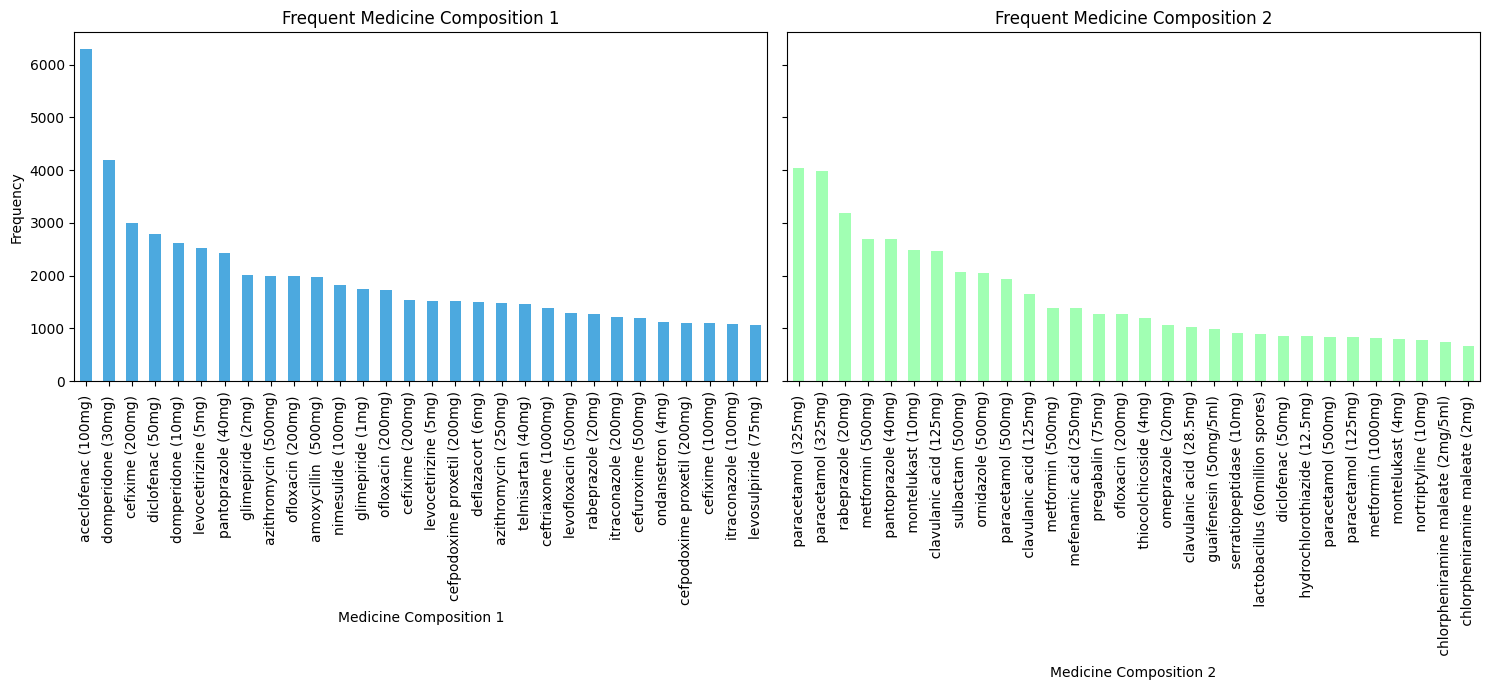

In [ ]:
comp1_counts = database['short_composition1'].value_counts().head(30)
comp2_counts = database['short_composition2'].value_counts().head(30)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharey=True)
# composition1 bar chart
comp1_counts.plot(kind='bar', ax=ax1, color='#4ca9df', title='Frequent Medicine Composition 1')
ax1.set_xlabel('Medicine Composition 1')
ax1.set_ylabel('Frequency')
# composition2 bar chart
comp2_counts.plot(kind='bar', ax=ax2, color='#a1ffb3', title='Frequent Medicine Composition 2')
ax2.set_xlabel('Medicine Composition 2')
# Adjust layout and show plot
plt.tight_layout()
plt.show()

# INSIGHT: Aceclofenac (100mg) is the most frequently occurring medicine among composition 1, with a frequency exceeding 6000. Paracetamol (325mg) is the most frequently occurring medicine among composition 1. Both have "pain analgesics" therapeutic class.

## MODELLING

In [3]:
# Load cleaned training data and medicine database
training = pd.read_csv("/content/drive/MyDrive/COMPFEST DS - Sevolve/Final Project/dataset/medicine_training.csv")
database = pd.read_csv("/content/drive/MyDrive/COMPFEST DS - Sevolve/Final Project/dataset/med_database.csv")

In [4]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220981 entries, 0 to 220980
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   name                220981 non-null  object
 1   short_composition1  220981 non-null  object
 2   short_composition2  98037 non-null   object
 3   use0                220981 non-null  object
 4   use1                65509 non-null   object
 5   use2                25227 non-null   object
 6   use3                6522 non-null    object
 7   use4                4421 non-null    object
 8   Chemical Class      122468 non-null  object
 9   Habit Forming       220981 non-null  bool  
 10  Therapeutic Class   220915 non-null  object
 11  Action Class        122675 non-null  object
dtypes: bool(1), object(11)
memory usage: 18.8+ MB


### FEATURE ENGINEERING

In [5]:
# 1a. with frequency encoding
# weakness: information loss due to values with same frequency will have the same numeric representation
training_copy = training.copy()
training_copy['encoded_use0'] = training_copy['use0'].map(training_copy['use0'].value_counts(normalize=True))

training_copy['encoded_use1'] = training_copy['use1'].map(training_copy['use1'].value_counts(normalize=True))
training_copy['encoded_use1'].fillna(0, inplace=True)
training_copy['encoded_use2'] = training_copy['use2'].map(training_copy['use2'].value_counts(normalize=True))
training_copy['encoded_use2'].fillna(0, inplace=True)
training_copy['encoded_use3'] = training_copy['use3'].map(training_copy['use3'].value_counts(normalize=True))
training_copy['encoded_use3'].fillna(0, inplace=True)
training_copy['encoded_use4'] = training_copy['use4'].map(training_copy['use4'].value_counts(normalize=True))
training_copy['encoded_use4'].fillna(0, inplace=True)

training_copy['chemical_class'] = training_copy['Chemical Class'].map(training_copy['Chemical Class'].value_counts(normalize=True))
training_copy['chemical_class'].fillna(0, inplace=True)
training_copy['action_class'] = training_copy['Action Class'].map(training_copy['Action Class'].value_counts(normalize=True))
training_copy['action_class'].fillna(0, inplace=True)

training_copy['short_composition1'] = training_copy['short_composition1'].map(training_copy['short_composition1'].value_counts(normalize=True))
training_copy['short_composition1'].fillna(0, inplace=True)
training_copy['short_composition2'] = training_copy['short_composition2'].map(training_copy['short_composition2'].value_counts(normalize=True))
training_copy['short_composition2'].fillna(0, inplace=True)

training_copy.drop(['use0', 'use1', 'use2', 'use3', 'use4', 'Chemical Class', 'Action Class'], axis=1, inplace=True)

# replacing bool values to 0 or 1
training_copy['Habit Forming'] = training_copy['Habit Forming'].replace({True: 1, False: 0})

In [6]:
# 2. ONE HOT ENCODING
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_therapeutic = one_hot_encoder.fit_transform(training[['Therapeutic Class']])
ohe_therapeutic_df = pd.DataFrame(ohe_therapeutic, columns=one_hot_encoder.get_feature_names_out(['Therapeutic Class']))

# concatenating one hot encoded shits
training_copy = pd.concat([training_copy, ohe_therapeutic_df], axis=1).drop('Therapeutic Class', axis=1)

### TRAINING

In [7]:
# 3. Build and train the Autoencoder (learning dense embeddings)
import tensorflow as tf
from tensorflow.keras import layers, models

# define the dimensions
training_data = training_copy.drop('name', axis=1).astype(np.float32)
input_dim = training_data.shape[1]
training_data = training_data.to_numpy()
encoding_dim = 8

# Autoencoder model architecture
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(64, activation='relu')(input_layer)
encoded = layers.Dense(32, activation='relu')(encoded)

encoded = layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(input_dim, activation='sigmoid')(decoded)

# autoencoder model + compiling
autoencoder = models.Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# training autoencoder
history = autoencoder.fit(training_data, training_data,
                          epochs=10,
                          batch_size=64,
                          shuffle=True,
                          validation_split=0.2)

# Extract the encoder model to get the dense embeddings
encoder = models.Model(inputs=input_layer, outputs=encoded)

Epoch 1/10
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0284 - val_loss: 0.0031
Epoch 2/10
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0037 - val_loss: 0.0023
Epoch 3/10
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 4/10
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 5/10
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 6/10
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 7/10
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 8/10
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 9/10
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 10/10
2763/2763 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0019 - val_loss: 0.0020


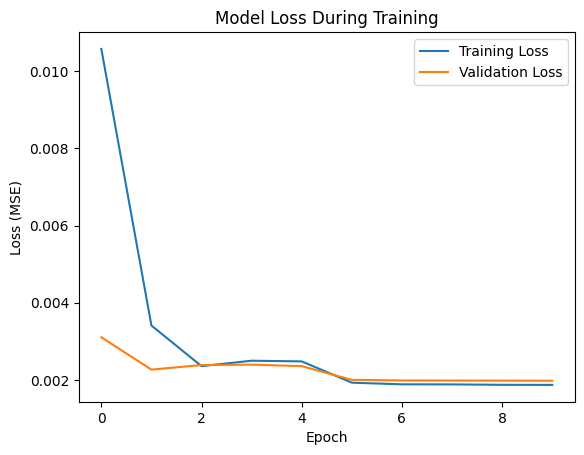

In [8]:
import matplotlib.pyplot as plt

# Plotting the loss function
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [9]:
# Generate embeddings for the entire dataset
embeddings = encoder.predict(training_data)

6906/6906 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step


In [10]:
# 4a. Calculating similarity (COSINE SIMILARITY)
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_medicines(medicine_index, top_n=5):
    # Compute similarity scores
    similarity_scores = cosine_similarity([embeddings[medicine_index]], embeddings).flatten()

    # Sort by similarity scores
    similar_indices = similarity_scores.argsort()[::-1]

    # Extract top_n indices and scores
    top_indices = similar_indices[:top_n]
    top_scores = similarity_scores[top_indices]

    # Rank results with scores
    results = list(training_copy['name'].iloc[top_indices])
    return results

In [ ]:
# 4b. Calculating similarity alternative (FAISS)
import faiss

def faiss_similar_med(medicine_index, top_n=5):
    # Create an index
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)

    # Query the index for similar items
    distances, indices = index.search(np.array([embeddings[medicine_index]]), top_n+1)  # +1 to exclude the query item itself

    similar_indices = indices[0][1:]  # Exclude the first index (query item itself)
    return training_copy['name'].iloc[similar_indices]

### INFERENCE & EVALUATION

In [12]:
# MODEL INFERENCE
def run_model(med_name):
    med_id = database.query(f'name == "{med_name}"').index[0]
    similar_medicines = find_similar_medicines(med_id, top_n=20)
    indices = []
    for name in similar_medicines:
        index = database.query(f'name == "{name}"').index[0]
        indices.append(index)
    return database.drop([f'substitute{i}' for i in range(5)], axis=1).iloc[indices].sort_values(by='price(₹)', ascending=False)

user_input = input('Medicine name: ')  # example: guficol plus 0.5miu injection
run_model(user_input)

Medicine name: guficol plus 0.5miu injection


,name,price(₹),manufacturer_name,pack_size_label,short_composition1,short_composition2,sideEffect0,sideEffect1,sideEffect2,sideEffect3,sideEffect4,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
218964,zas-tin 3miu injection,4349.00,suzan pharma,vial of 1 injection,colistimethate sodium (3million iu),NaN,upset stomach,rash,paresthesia (tingling or pricking sensation),dizziness,slurred speech,severe bacterial infections,NaN,NaN,NaN,NaN,polypeptides,False,gastro intestinal,cell membrane active agent
46068,coligyl 3miu injection,3910.00,mankind pharma ltd,vial of 1 injection,colistimethate sodium (3million iu),NaN,upset stomach,rash,paresthesia (tingling or pricking sensation),dizziness,slurred speech,severe bacterial infections,NaN,NaN,NaN,NaN,polypeptides,False,gastro intestinal,cell membrane active agent
44897,colinex 3miu powder for injection,3549.00,pollen healthcure pvt. ltd.,vial of 1 powder for injection,colistimethate sodium (3million iu),NaN,upset stomach,rash,paresthesia (tingling or pricking sensation),dizziness,slurred speech,severe bacterial infections,NaN,NaN,NaN,NaN,polypeptides,False,gastro intestinal,cell membrane active agent
217608,zizant 3miu injection,3383.00,biological e ltd,vial of 1 injection,colistimethate sodium (3million iu),NaN,upset stomach,rash,paresthesia (tingling or pricking sensation),dizziness,slurred speech,severe bacterial infections,NaN,NaN,NaN,NaN,polypeptides,False,gastro intestinal,cell membrane active agent
141826,megcastin 3miu injection,2800.00,ridhima biocare,vial of 1 injection,colistimethate sodium (3million iu),NaN,upset stomach,rash,paresthesia (tingling or pricking sensation),dizziness,slurred speech,severe bacterial infections,NaN,NaN,NaN,NaN,polypeptides,False,gastro intestinal,cell membrane active agent
35801,colistin 3million iu injection,2668.00,taj pharma india ltd,vial of 1 powder for injection,colistimethate sodium (3million iu),NaN,upset stomach,rash,paresthesia (tingling or pricking sensation),dizziness,slurred speech,severe bacterial infections,NaN,NaN,NaN,NaN,polypeptides,False,gastro intestinal,cell membrane active agent
35801,colistin 3million iu injection,2668.00,taj pharma india ltd,vial of 1 powder for injection,colistimethate sodium (3million iu),NaN,upset stomach,rash,paresthesia (tingling or pricking sensation),dizziness,slurred speech,severe bacterial infections,NaN,NaN,NaN,NaN,polypeptides,False,gastro intestinal,cell membrane active agent
80341,eudomonas 3 injection,2610.00,varenyam healthcare pvt ltd,vial of 1 injection,colistimethate sodium (3million iu),NaN,upset stomach,rash,paresthesia (tingling or pricking sensation),dizziness,slurred speech,severe bacterial infections,NaN,NaN,NaN,NaN,polypeptides,False,gastro intestinal,cell membrane active agent
49999,clistril 3miu injection,2479.00,novo medi sciences pvt ltd,vial of 1 injection,colistimethate sodium (3million iu),NaN,upset stomach,rash,paresthesia (tingling or pricking sensation),dizziness,slurred speech,severe bacterial infections,NaN,NaN,NaN,NaN,polypeptides,False,gastro intestinal,cell membrane active agent
104153,icl 3million iu injection,2439.75,zuventus healthcare ltd,vial of 1 injection,colistimethate sodium (3million iu),NaN,upset stomach,rash,paresthesia (tingling or pricking sensation),dizziness,slurred speech,severe bacterial infections,NaN,NaN,NaN,NaN,polypeptides,False,gastro intestinal,cell membrane active agent


In [ ]:
import random

# EVALUATION (4a: cosine sim.)
sample_size = 1000
random_samples = random.sample(range(training.shape[0]), sample_size)

def calculate_accuracy(k=5):
    correct_count = 0
    for i in random_samples:  # or use `training.index` for the full dataset
        similar_medicines = find_similar_medicines(i, top_n=k)
        substitutes = [database.iloc[i][f'substitute{j}'] for j in range(5)]

        # Check if any recommended medicine is in the substitutes
        if database.loc[i, [f'substitute{j}' for j in range(5)]].isna().sum() == 0:
            correct_count += 1
            continue
        elif len(set(similar_medicines).intersection(substitutes)) > 0:
            correct_count += 1

    accuracy = correct_count / sample_size  # or `training.index` for full dataset
    return accuracy

# Example usage
for num_k in [5, 10, 30, 50, 100, 500, 1000, 2000, 3000, 5000, 10000]:
    accuracy = calculate_accuracy(k=num_k)
    print(f'accuracy (k={num_k}): {accuracy:.4f}')

accuracy (k=5): 0.9220
accuracy (k=10): 0.9260
accuracy (k=30): 0.9380
accuracy (k=50): 0.9420
accuracy (k=100): 0.9500
accuracy (k=500): 0.9650
accuracy (k=1000): 0.9690
accuracy (k=2000): 0.9690
accuracy (k=3000): 0.9690
accuracy (k=5000): 0.9690
accuracy (k=10000): 0.9690


In [ ]:
# EVALUATION (4b: FAISS)
sample_size = 1000
random_samples = random.sample(range(training.shape[0]), sample_size)

def calculate_accuracy(k=5):
    correct_count = 0
    for i in random_samples:  # or use `training.index` for the full dataset
        similar_medicines = faiss_similar_med(i, top_n=k)
        substitutes = [database.iloc[i][f'substitute{j}'] for j in range(5)]

        # Check if any recommended medicine is in the substitutes
        if len(set(similar_medicines).intersection(substitutes)) > 0:
            correct_count += 1

    accuracy = correct_count / sample_size  # or `training.index` for full dataset
    return accuracy

# Example usage
for num_k in [5, 10, 30, 50, 100, 500, 1000, 2000, 3000, 5000, 10000]:
    accuracy = calculate_accuracy(k=num_k)
    print(f'accuracy (k={num_k}): {accuracy:.4f}')

accuracy (k=5): 0.2580
accuracy (k=10): 0.3690
accuracy (k=30): 0.5150
accuracy (k=50): 0.6120
accuracy (k=100): 0.7500
accuracy (k=500): 0.9120
accuracy (k=1000): 0.9540
accuracy (k=2000): 0.9540
accuracy (k=3000): 0.9580
accuracy (k=5000): 0.9600
accuracy (k=10000): 0.9590
